## 라이브러리 설정
# 데이터셋 불러오기

In [68]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# skleran 데이터셋에서 보스턴 주택 데이터셋 로딩
from sklearn import datasets
housing = datasets.load_boston()

# 딕셔너리 형태이므로, key 값을 확인
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [69]:
# 판다스 데이터프레임으로 변환
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])
target = pd.DataFrame(housing['target'], columns=['Target'])
# 데이터셋 크기
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


In [70]:
# 데이터프레임 결합하기
df = pd.concat([data, target], axis=1)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


# 데이터 탐색 (EDA)

In [71]:
# 데이터프레임의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [72]:
# 결측값 확인
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

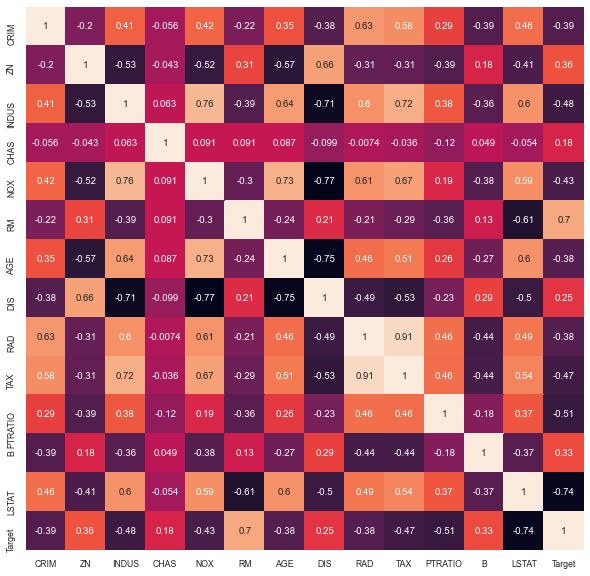

In [73]:
# 상관계수 행렬
df_corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False);
plt.show()

In [74]:
# 변수 간의 상관관계 분석 - Target 변수와 상관관계가 높은 순서대로 정리
corr_order = df_corr.loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [75]:
# Target 변수와 상관관계가 높은 4개 변수를 추출
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[:, plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


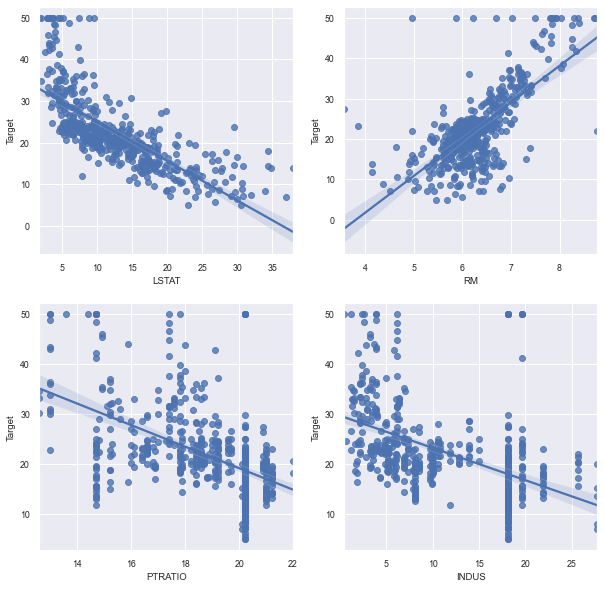

In [76]:
# regplot으로 선형회귀선 표시
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    ax1 = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=ax1)    
plt.show()

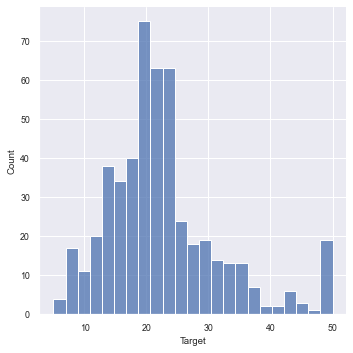

In [77]:
# Target 데이터의 분포
sns.displot( x='Target', kind='hist', data=df)
plt.show()

# 데이터 전처리
## 피처 스케일링

In [78]:
# 사이킷런 MinMaxScaler 적용 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled = df.iloc[:, :-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

# 스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


## 학습용-테스트 데이터셋 분리하기

In [79]:
# 학습 - 테스트 데이터셋 분할
from sklearn.model_selection import train_test_split
X_data = df.loc[:, ['LSTAT', 'RM']]
y_data = df.loc[:, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


# Baseline 모델 - 선형 회귀

In [80]:
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print ("회귀계수(기울기): ", np.round(lr.coef_, 1))
print ("상수항(절편): ", np.round(lr.intercept_, 1))

회귀계수(기울기):  [-23.2  25.4]
상수항(절편):  16.3


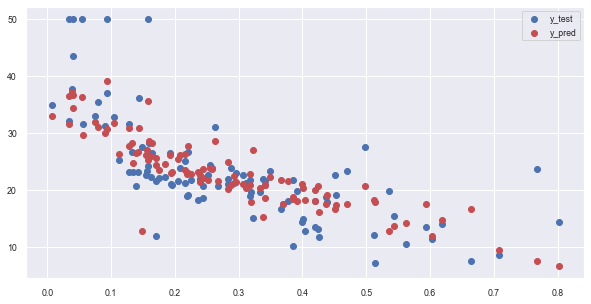

In [81]:
# 예측
y_test_pred = lr.predict(X_test)

# 예측값, 실제값의 분포
plt.figure(figsize=(10, 5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')  
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

### MSE는 Mean Squared Error 실제값과 예측값의 차이 제곱의 평균값을 말함.
### 이 기계가 어느정도 예측을 하는 지 알 수 있음.

In [82]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 30.8042
Test MSE: 29.5065


## 교차검증
> 404개를 3개로 그룹을 지음(cv=5)

In [83]:
# cross_val_score 함수
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_scores = -1*cross_val_score(lr, X_train, y_train, cv=5,
                                scoring='neg_mean_squared_error')
print("개별 Fold의 MSE: ", np.round(mse_scores, 4))
print("평균 MSE: %.4f" % np.mean(mse_scores))  

개별 Fold의 MSE:  [31.465  34.668  28.9147 29.3535 34.6627]
평균 MSE: 31.8128


# L1/L2 규제

In [84]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
print("원본 학습 데이터셋: ", X_train.shape)
print("2차 다항식 변환 데이터셋: ", X_train_poly.shape)

원본 학습 데이터셋:  (404, 2)
2차 다항식 변환 데이터셋:  (404, 6)


ㄴ 404개의 데이터를 6개로 나눔.

In [85]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)


Train MSE: 21.5463
Test MSE: 16.7954


### 조금더 줄이기위해 15차항으로 변경

In [86]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
X_train_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 11.2524
Test MSE: 110707213965391.6250


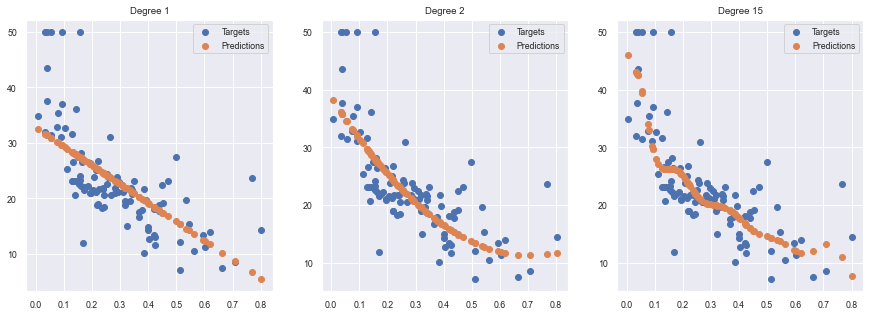

In [87]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    ax1 = plt.subplot(1, 3, n+1)
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    X_train_poly = pf.fit_transform(X_train.loc[:, ['LSTAT']])
    X_test_poly = pf.fit_transform(X_test.loc[:, ['LSTAT']])
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_test_pred = lr.predict(X_test_poly)
    # 실제값 분포
    plt.scatter(X_test.loc[:, ['LSTAT']], y_test, label='Targets') 
    # 예측값 분포
    plt.scatter(X_test.loc[:, ['LSTAT']], y_test_pred, label='Predictions') 
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()  
plt.show()

`alpha` 값을 통해 규제를 강하게 할것 인가 약하게 할것 인가.
> alpha = ??

In [88]:
# Ridge (L2 규제) alpha=2.5
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=2.5)
rdg.fit(X_train_poly, y_train)

print('------------')
print(pd.DataFrame(list(zip(lr.coef_)), columns=['importances']).sort_values('importances'));
print(pd.DataFrame(list(zip(rdg.coef_)), columns=['importances']).sort_values('importances'));
print('------------')

y_train_pred = rdg.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

------------
     importances
11 -4.664409e+10
9  -2.951970e+10
13 -1.709504e+10
7  -5.067346e+09
15 -6.637537e+08
5  -2.197439e+08
3  -1.733155e+06
1  -1.157254e+03
0   0.000000e+00
2   6.379021e+04
4   2.504586e+07
6   1.269206e+09
14  5.018221e+09
8   1.439412e+10
12  3.467916e+10
10  4.382559e+10
    importances
1    -30.001183
2     -6.790224
15    -0.086007
0      0.000000
14     0.066175
13     0.248265
12     0.467195
11     0.731541
10     1.051444
3      1.234602
9      1.437685
8      1.898434
7      2.429932
6      2.990986
4      3.300176
5      3.432931
------------
Train MSE: 35.9484
Test MSE: 42.0011


In [89]:
# Ridge (L2 규제) alpha=100
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=100)
rdg.fit(X_train_poly, y_train)

print('------------')
print(pd.DataFrame(list(zip(lr.coef_)), columns=['importances']).sort_values('importances'));
print(pd.DataFrame(list(zip(rdg.coef_)), columns=['importances']).sort_values('importances'));
print('------------')

y_train_pred = rdg.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = rdg.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)



------------
     importances
11 -4.664409e+10
9  -2.951970e+10
13 -1.709504e+10
7  -5.067346e+09
15 -6.637537e+08
5  -2.197439e+08
3  -1.733155e+06
1  -1.157254e+03
0   0.000000e+00
2   6.379021e+04
4   2.504586e+07
6   1.269206e+09
14  5.018221e+09
8   1.439412e+10
12  3.467916e+10
10  4.382559e+10
    importances
1     -4.238104
2     -2.676318
3     -1.630219
4     -1.042794
5     -0.702972
6     -0.495680
7     -0.362642
8     -0.273432
9     -0.211376
10    -0.166874
11    -0.134142
12    -0.109546
13    -0.090720
14    -0.076078
15    -0.064524
0      0.000000
------------
Train MSE: 67.0020
Test MSE: 69.1445


In [90]:
# Lasso (L1 규제)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.05)
las.fit(X_train_poly, y_train)

y_train_pred = las.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = las.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 32.3204
Test MSE: 37.7103


In [91]:
# ElasticNet (L2/L1 규제)
from sklearn.linear_model import ElasticNet
ela = ElasticNet(alpha=0.01, l1_ratio=0.7)
ela.fit(X_train_poly, y_train)

y_train_pred = ela.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)
y_test_pred = ela.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 33.7551
Test MSE: 39.4968


# 트리 기반 모델 - 비선형 회귀
> depth = 3, random_state = 12

In [92]:
# 의사결정 나무
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=3, random_state=12)
dtr.fit(X_train, y_train)

y_train_pred = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)  

y_test_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 18.8029
Test MSE: 17.9065


In [93]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=3, random_state=12)
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)  

y_test_pred = rfr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 16.0201
Test MSE: 17.7751


In [98]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)  

y_test_pred = xgbr.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

print(xgbr.predict(pd.DataFrame({'LSTAT':[0.033389],'RM':[0.658555]})))

Train MSE: 3.5176
Test MSE: 20.2060
[34.530243]
